# **Deteksi Outlier dengan K-Nearest Neighbors (KNN) dalam Data Understanding**
## 1. Mengapa KNN Bisa Digunakan untuk Deteksi Outlier?  
K-Nearest Neighbors (KNN) bisa digunakan untuk deteksi outlier karena konsep utamanya yang berbasis kedekatan atau jarak antar data. Berikut adalah alasan utama mengapa KNN dapat digunakan dalam deteksi outlier:

a. **Mengukur Jarak Antar Titik Data**
- KNN menggunakan metrik jarak (misalnya, Euclidean, Manhattan, atau lainnya) untuk menentukan seberapa dekat suatu titik dengan titik-titik lain dalam dataset.
- Outlier biasanya memiliki jarak yang lebih jauh dari sebagian besar titik data lainnya.

b. **Density-Based Outlier Detection**
- Dalam metode seperti k-Nearest Neighbor Distance, sebuah titik dianggap sebagai outlier jika jaraknya ke k-tetangga terdekatnya jauh lebih besar dibandingkan titik lain dalam dataset.
- Titik yang memiliki jumlah tetangga yang sangat sedikit dalam radius tertentu juga bisa dianggap sebagai outlier.

c. **Local Outlier Factor (LOF)**
- LOF adalah metode berbasis KNN yang membandingkan kerapatan lokal suatu titik dengan kerapatan titik lain di sekitarnya.
- Jika suatu titik memiliki kepadatan yang jauh lebih rendah dibandingkan tetangga-tetangganya, maka titik tersebut bisa dianggap sebagai outlier.

d. **Non-parametric Approach**
- KNN tidak membuat asumsi tentang distribusi data, sehingga cocok untuk mendeteksi outlier pada dataset yang tidak mengikuti distribusi tertentu.

6. **Fleksibilitas dalam Multidimensional Space**
- KNN dapat bekerja dengan baik pada data berdimensi tinggi karena hanya bergantung pada metrik jarak tanpa perlu melakukan pemodelan eksplisit.
Contoh Penggunaan KNN untuk Deteksi Outlier:
- Anomali dalam Data Keuangan: Mendeteksi transaksi penipuan dengan mengidentifikasi transaksi yang jauh berbeda dari pola normal.
- Pendeteksian Kegagalan Mesin: Mengidentifikasi sensor yang menunjukkan perilaku tidak biasa.
- Analisis Data Medis: Mendeteksi pasien dengan kondisi kesehatan ekstrem yang berbeda dari mayoritas.

## 2. Langkah-Langkah Deteksi Outlier dengan KNN  
a. **Persiapan Dataset**
- Pastikan dataset sudah bersih dan siap digunakan.
Jika terdapat data kategori, lakukan encoding agar bisa digunakan dalam perhitungan jarak.
- Normalisasi atau standardisasi data (misalnya menggunakan Min-Max Scaling atau StandardScaler) agar setiap fitur memiliki skala yang seragam.

b. **Tentukan Metrik Jarak**
- Pilih metrik jarak yang sesuai, misalnya:
- Euclidean Distance (jarak garis lurus antar titik)
- Manhattan Distance (jarak berdasarkan sumbu X dan Y)
- Minkowski Distance (generalized distance metric)

c. **Tentukan Nilai k (Jumlah Tetangga Terdekat)**
- Nilai k harus cukup besar untuk menangkap pola distribusi data, tetapi tidak terlalu besar agar tetap sensitif terhadap outlier.
- Umumnya, k dipilih antara 5 hingga 10 tergantung pada ukuran dataset.

d, **Hitung Jarak ke k Tetangga Terdekat**
- Untuk setiap titik data, hitung jarak ke k tetangga terdekatnya.
- Simpan nilai jarak rata-rata atau jarak maksimum dari titik tersebut ke k tetangganya.

e. **Identifikasi Outlier**

f. **Visualisasi Hasil**
- Jika dataset memiliki dua atau tiga dimensi, gunakan scatter plot untuk melihat penyebaran outlier.
- Untuk dataset berdimensi tinggi, gunakan metode seperti Principal Component Analysis (PCA) untuk mereduksi dimensi sebelum visualisasi.

g. **Evaluasi dan Penyesuaian**

Sesuaikan nilai k atau metrik jarak jika hasil deteksi outlier belum optimal.
Coba metode tambahan seperti DBSCAN atau Isolation Forest untuk membandingkan performa deteksi outlier.


## Kesimpulan  
KNN dapat digunakan dalam tahap Data Understanding untuk mendeteksi outlier dengan menganalisis jarak antara suatu titik dengan tetangga terdekatnya. Dengan metode seperti K-Nearest Neighbor Distance dan Local Outlier Factor (LOF), kita dapat menandai data yang memiliki kepadatan rendah atau jauh dari data lainnya sebagai outlier. Pemilihan nilai K yang tepat dan metrik jarak yang sesuai menjadi faktor penting untuk keberhasilan deteksi outlier dengan KNN.

In [ ]:
%pip install pymysql
%pip install psycopg2

Kode diatas digunakan untuk menginstal dua pustaka Python, yaitu `pymysql` dan `psycopg2`, yang berfungsi sebagai konektor untuk basis data (database). Pustaka `pymysql` digunakan untuk menghubungkan aplikasi Python dengan database MySQL atau MariaDB menggunakan protokol MySQL asli. Sementara itu, `psycopg2` merupakan pustaka yang digunakan untuk menghubungkan Python dengan database PostgreSQL, menyediakan antarmuka yang efisien untuk menjalankan perintah SQL dan berinteraksi dengan database tersebut. Kedua perintah ini menggunakan **magic command** `%pip`, yang umumnya digunakan dalam lingkungan Jupyter Notebook untuk memastikan bahwa paket yang diperlukan diinstal dalam kernel yang sedang berjalan.

## **Code Untuk Menampilkan Semua Data dan Grafiknya**

 id           class  petal length  petal width  sepal length  sepal width  knn_distance  outlier_knn
  1     Iris-setosa           1.3          0.2           5.1          3.5      4.115823        False
  2     Iris-setosa         122.0        123.0         223.0        121.0    300.017399        False
  3     Iris-setosa         234.0        241.0         121.0        142.0    378.319415        False
  7     Iris-setosa           1.4          0.3           4.6          3.4      4.112177        False
  8     Iris-setosa           1.0          0.2           5.0          3.4      4.378356        False
  9     Iris-setosa           4.0          0.2           5.0          2.9      2.655184        False
 10     Iris-setosa           1.5          0.3           4.9          3.1      3.906405        False
 11     Iris-setosa           1.5          0.2           5.4          3.7      3.885872        False
 12     Iris-setosa           1.6          0.3           4.8          3.4      3.871692    

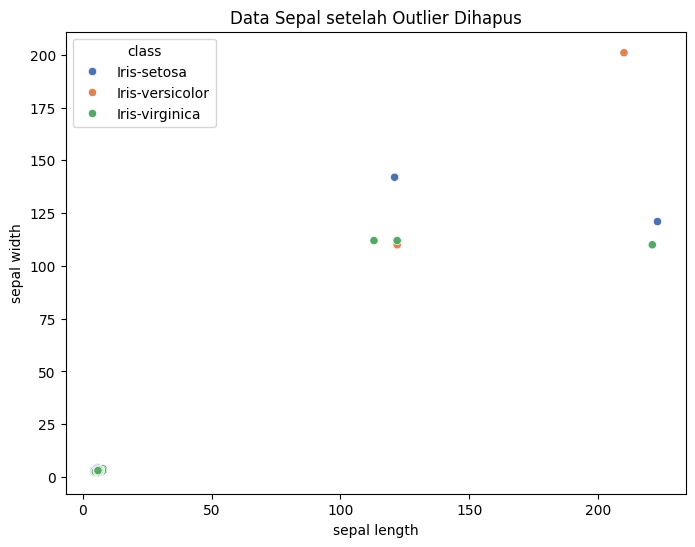

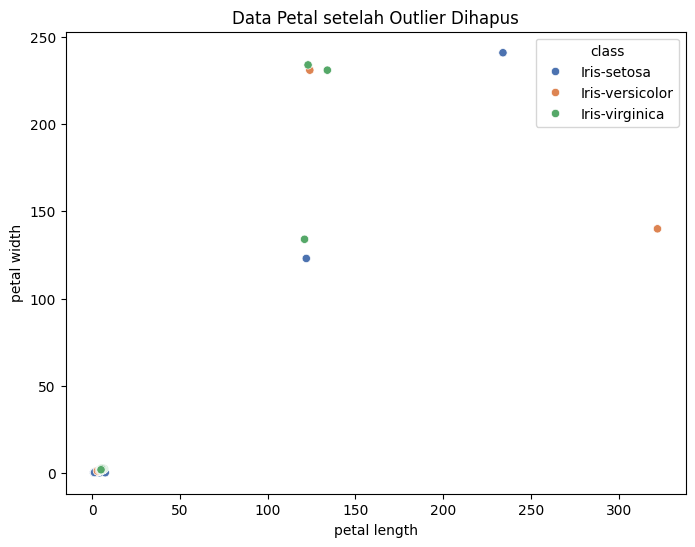

In [ ]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

def get_pg_data():
    conn = psycopg2.connect(
        host="pg-292ef6f0-postgesql.d.aivencloud.com",
        user="avnadmin",
        password="AVNS_iFCt7xp02vTczdlhooY",
        database="defaultdb",
        port=16905
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM firmandani.postgree")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-ef66224-mmsql.d.aivencloud.com",
        user="avnadmin",
        password="AVNS_NrOpqQJhytxwdcC6shv",
        database="defaultdb",
        port=21910
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM flowers")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()
df_postgresql = df_postgresql.rename(columns={'Class': 'class'})

# Gabungkan berdasarkan kolom 'id'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil data fitur numerik
feature_columns = ["petal length", "petal width", "sepal length", "sepal width"]
data_values = df_merged[feature_columns].values

# KNN Outlier Detection
def knn_outlier_detection(data, k=90):
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(data)
    distances, _ = neigh.kneighbors(data)
    avg_distances = distances[:, -1]  # Ambil jarak k-terjauh sebagai skor
    return avg_distances

# Hitung K-NN distance
df_merged["knn_distance"] = knn_outlier_detection(data_values, k=90)

# Tentukan threshold sebagai nilai rata-rata + 2 standar deviasi
threshold = df_merged["knn_distance"].mean() + 2 * df_merged["knn_distance"].std()
df_merged["outlier_knn"] = df_merged["knn_distance"] > threshold

# Hapus data outlier
df_filtered = df_merged[~df_merged["outlier_knn"]]

# Cetak hasil setelah outlier dihapus
print(df_filtered.to_string(index=False))
print(f"\nJumlah data setelah outlier dihapus: {len(df_filtered)}")

# Visualisasi setelah outlier dihapus
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_filtered["sepal length"], y=df_filtered["sepal width"],
    hue=df_filtered["class"], palette="deep"
)
plt.title("Data Sepal setelah Outlier Dihapus")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_filtered["petal length"], y=df_filtered["petal width"],
    hue=df_filtered["class"], palette="deep"
)
plt.title("Data Petal setelah Outlier Dihapus")
plt.show()

### **1. Cara Perhitungan**
a Mengambil Data dari Database PostgreSQL & MySQL
 1. Kode mengambil data dari PostgreSQL (get_pg_data()) dan MySQL (get_mysql_data()).
 2. Data dari kedua database digabungkan berdasarkan kolom id dan class.

b Menghitung Jarak KNN
 1. Menentukan fitur numerik yang akan digunakan dalam analisis
  - Hanya kolom numerik yang dipakai dalam deteksi outlier.

c. Melatih model KNN dengan k=90:
1. NearestNeighbors(n_neighbors=90) berarti setiap titik data akan dihitung jarak ke 90 tetangga terdekatnya.
2. kneighbors() menghitung jarak setiap titik ke 90 tetangganya.
3. Jarak ke-90 tetangga dipilih sebagai ukuran outlier. Semakin besar nilai ini, semakin mungkin data itu adalah outlier.

d  Menentukan Outlier
1. Menentukan threshold outlier:
- Threshold ditentukan sebagai rata-rata jarak + 2 standar deviasi.
- Mengapa +2 standar deviasi?
 - Dalam distribusi normal, 95% data berada dalam ±2 standar deviasi dari rata-rata.
 - Data yang memiliki jarak lebih dari ini dianggap outlier.
2. Menandai data sebagai outlier atau bukan:
- Jika jarak ke-90 lebih besar dari threshold, maka data tersebut outlier.

e Menghapus Outlier
1. Hanya menyimpan data yang bukan outlier:
python
  - Data yang bukan outlier (False) dipertahankan.

### **2. Cara Kerja Perhitungan**
Kode ini menggunakan metode K-Nearest Neighbors (KNN) Outlier Detection yang bekerja dengan mengukur jarak setiap titik ke tetangga terdekatnya. Berikut adalah langkah-langkahnya:

1. Ambil data dari dua database (PostgreSQL & MySQL).
2. Gabungkan data berdasarkan id dan class.
3. Pilih fitur numerik yang digunakan untuk analisis outlier.
4. Gunakan KNN untuk menghitung jarak ke 90 tetangga terdekat untuk setiap titik data.
5. Gunakan threshold rata-rata + 2 standar deviasi untuk menentukan outlier.
6. Hapus outlier dan simpan data bersih.
7. Visualisasikan data sebelum dan sesudah outlier dihapus.

### **3. Kegunaan Kode**
Kode ini berguna untuk:

1. Mengidentifikasi outlier dalam dataset berdasarkan jarak ke tetangga terdekat.
2. Membersihkan dataset dari data yang tidak sesuai atau ekstrem.
3. Meningkatkan akurasi model machine learning dengan menghapus data anomali.
4. Memudahkan analisis data dengan visualisasi yang lebih bersih.





### **Memisahkan Outlier dari Data**

In [ ]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split , KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, Normalizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.inspection import DecisionBoundaryDisplay

def get_pg_data():
    conn = psycopg2.connect(
        host="pg-292ef6f0-postgesql.d.aivencloud.com",
        user="avnadmin",
        password="AVNS_iFCt7xp02vTczdlhooY",
        database="defaultdb",
        port=16905
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM firmandani.postgree")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-ef66224-mmsql.d.aivencloud.com",
        user="avnadmin",
        password="AVNS_NrOpqQJhytxwdcC6shv",
        database="defaultdb",
        port=21910
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM flowers")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()
df_postgresql = df_postgresql.rename(columns={'Class': 'class'})

# Gabungkan berdasarkan kolom 'id' dan 'class'
df_merge = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil data fitur numerik tanpa kolom 'class'
feature_columns = ["petal length", "petal width", "sepal length", "sepal width"]
data_values = df_merge[feature_columns].values

# Inisialisasi model LOF
clf = LocalOutlierFactor(n_neighbors=90)
label = clf.fit_predict(data_values)

# Tambahkan hasil label ke dataframe
df_merge["outlier_label"] = label

# Cetak hasil dengan ID dan class
print(df_merge.to_string(index=False))

num_outliers = (label == -1).sum()
print(f"\nJumlah outlier: {num_outliers}")
df_filtered = df_merge[label == 1].drop(columns=["outlier_label"], errors='ignore')
outliers = df_merge[label == -1].drop(columns=["outlier_label"], errors='ignore')
print("\nData Outlier:")
print(outliers.to_string(index=False))
print("\nJumlah data setelah dihapus : ",len(df_filtered))
print("\nData tidak outlier :")
print(df_filtered.to_string(index=False))

 id           class  petal length  petal width  sepal length  sepal width  outlier_label
  1     Iris-setosa           1.3          0.2           5.1          3.5              1
  2     Iris-setosa         122.0        123.0         223.0        121.0             -1
  3     Iris-setosa         234.0        241.0         121.0        142.0             -1
  4     Iris-setosa         210.0        423.0         135.0       1423.0             -1
  5     Iris-setosa         233.0        230.0         123.0        241.0             -1
  6     Iris-setosa         201.0        221.0         521.0        123.0             -1
  7     Iris-setosa           1.4          0.3           4.6          3.4              1
  8     Iris-setosa           1.0          0.2           5.0          3.4              1
  9     Iris-setosa           4.0          0.2           5.0          2.9              1
 10     Iris-setosa           1.5          0.3           4.9          3.1              1
 11     Iris-setosa  

### **1. Cara Perhitungan**
Kode ini menggunakan Local Outlier Factor (LOF) untuk mendeteksi outlier dalam dataset berdasarkan kepadatan lokal (local density). LOF bekerja dengan cara berikut:

1. Menghitung jarak ke tetangga terdekat

- n_neighbors=90 berarti setiap titik akan dihitung jaraknya ke 90 tetangga terdekat.
- Jarak ini digunakan untuk mengukur kepadatan lokal dari titik tersebut.
2. Membandingkan kepadatan lokal titik tersebut dengan kepadatan lokal tetangganya
- Jika kepadatan lokal titik lebih rendah dibandingkan tetangga-tetangganya, maka titik ini dianggap outlier.
3. LOF memberikan skor (-1 untuk outlier, 1 untuk normal)
- Jika skor -1, maka titik dianggap outlier.
- Jika skor 1, maka titik dianggap bukan outlier.

### **2. Cara Kerja Perhitungan**
Berikut adalah langkah-langkah utama dalam kode ini:

a. Mengambil Data dari Database PostgreSQL & MySQL
- Menghubungkan ke PostgreSQL dan mengambil data.
- Data dikembalikan dalam bentuk DataFrame (Pandas).
- Menghubungkan ke MySQL dan mengambil data.
- Data juga dikembalikan dalam bentuk DataFrame.

b Menggabungkan Data dari PostgreSQL & MySQL
- Menggabungkan kedua dataset berdasarkan id dan class.
- Kolom Class di PostgreSQL diubah menjadi class agar sesuai dengan MySQL.

c  Menentukan Fitur Numerik
- Hanya memilih kolom numerik untuk deteksi outlier.
- Data dikonversi ke bentuk array NumPy agar bisa digunakan oleh LOF.

d. Mendeteksi Outlier dengan LOF
- Menggunakan Local Outlier Factor (LOF) untuk mendeteksi outlier.
- n_neighbors=90 berarti setiap titik dibandingkan dengan 90 tetangga terdekatnya.
- fit_predict() mengembalikan label:
 - 1 → Bukan outlier (data normal)
 - -1 → Outlier

e. Menambahkan Label Outlier ke DataFrame
- Menambahkan kolom outlier_label ke dataframe.
- Menampilkan hasil deteksi outlier dalam tabel.

f. Menghitung Jumlah Outlier
- Menghitung jumlah data yang dianggap outlier dengan menjumlahkan label -1.

g. Memisahkan Data Outlier dan Non-Outlier
- Data yang bukan outlier (label == 1) disimpan di df_filtered.
- Data yang outlier (label == -1) disimpan di outliers.
- Kolom outlier_label dihapus agar tidak mengganggu analisis selanjutnya.

h. Menampilkan Hasil
- Menampilkan semua data yang dianggap outlier.
- Menampilkan jumlah data setelah outlier dihapus.
- Menampilkan data yang bukan outlier.



### **Menghitung Akurasi Data**





In [ ]:
X = df_merged[feature_columns]
y = df_merged["class"]

# Encode label kelas ke numerik
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Menerapkan LOF untuk deteksi outlier
lof = LocalOutlierFactor(n_neighbors=90, contamination=0.1)
outlier_labels = lof.fit_predict(X)
df_merged["outlier"] = outlier_labels

# Pisahkan data dengan outlier dan tanpa outlier
df_cleaned = df_merged[df_merged["outlier"] == 1].drop(columns=["outlier"])

# Membagi data menjadi training (80%) dan testing (20%)
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(
    df_cleaned[feature_columns],
    label_encoder.transform(df_cleaned["class"]),
    test_size=0.2,
    random_state=42
)

# Pipeline dengan StandardScaler dan KNN
knn_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=11))
])

# Latih model pada data dengan outlier
knn_pipeline.fit(X_train_all, y_train_all)
y_pred_all = knn_pipeline.predict(X_test_all)
accuracy_all = accuracy_score(y_test_all, y_pred_all)
print("Akurasi dengan outlier:", accuracy_all)
print(classification_report(y_test_all, y_pred_all, target_names=label_encoder.classes_))

# Latih model pada data tanpa outlier
knn_pipeline.fit(X_train_clean, y_train_clean)
y_pred_clean = knn_pipeline.predict(X_test_clean)
accuracy_clean = accuracy_score(y_test_clean, y_pred_clean)
print("Akurasi tanpa outlier:", accuracy_clean)
print(classification_report(y_test_clean, y_pred_clean, target_names=label_encoder.classes_))

Akurasi dengan outlier: 0.9333333333333333
                 precision    recall  f1-score   support

    Iris-setosa       0.90      0.90      0.90        10
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.93        30
      macro avg       0.93      0.94      0.93        30
   weighted avg       0.94      0.93      0.93        30

Akurasi tanpa outlier: 0.9259259259259259
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.71      0.83         7
 Iris-virginica       0.80      1.00      0.89         8

       accuracy                           0.93        27
      macro avg       0.93      0.90      0.91        27
   weighted avg       0.94      0.93      0.92        27



Kode di atas melakukan deteksi outlier menggunakan **Local Outlier Factor (LOF)** dan membandingkan performa model **K-Nearest Neighbors (KNN)** pada data dengan dan tanpa outlier. Pertama, data fitur numerik (`X`) dan label kelas (`y`) diekstrak dari dataset yang telah digabungkan (`df_merged`). Label kelas kemudian dikonversi menjadi nilai numerik menggunakan **LabelEncoder**. LOF digunakan untuk mengidentifikasi outlier dengan mempertimbangkan **90 tetangga terdekat** dan menetapkan **10% dari data sebagai outlier**. Data yang tidak terdeteksi sebagai outlier disimpan dalam `df_cleaned`, sementara data asli tetap digunakan untuk perbandingan.  

Selanjutnya, dataset dibagi menjadi **data pelatihan (80%) dan pengujian (20%)**, baik untuk dataset dengan outlier (`X_train_all, X_test_all`) maupun tanpa outlier (`X_train_clean, X_test_clean`). Model **KNN (dengan 11 tetangga)** diterapkan dalam **pipeline yang mencakup StandardScaler** untuk menormalkan data sebelum pelatihan. Model pertama dilatih dengan **data yang masih mengandung outlier**, lalu diuji, dan hasil akurasinya dicetak. Kemudian, model yang sama dilatih menggunakan **data tanpa outlier**, dan akurasinya dibandingkan. Evaluasi model dilakukan dengan **classification report**, yang menunjukkan metrik seperti **precision, recall, dan F1-score**. Hasil akhirnya memungkinkan perbandingan dampak penghapusan outlier terhadap performa klasifikasi KNN.

### **Visualisasi Data**


Akurasi: 0.9629629629629629
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.86      0.92         7
 Iris-virginica       0.89      1.00      0.94         8

       accuracy                           0.96        27
      macro avg       0.96      0.95      0.95        27
   weighted avg       0.97      0.96      0.96        27



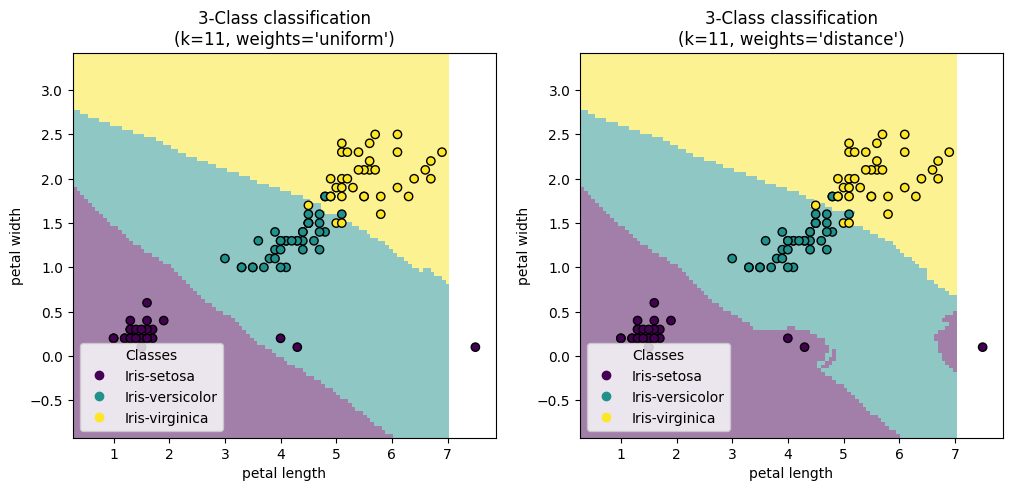

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.inspection import DecisionBoundaryDisplay

# Ambil dua fitur utama untuk visualisasi decision boundary
feature_columns = ["petal length", "petal width"]
X = df_cleaned[feature_columns]
y = df_cleaned["class"]

# Encode label kelas ke numerik
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Ubah nama kelas jadi angka

# Membagi data menjadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

# Pipeline dengan KNN dan StandardScaler
clf = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=11))
])

# Pelatihan model KNN
clf.fit(X_train, y_train)

# Evaluasi model
y_pred = clf.predict(X_test)
print(f"Akurasi: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Visualisasi Decision Boundary
_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    clf.set_params(knn__weights=weights).fit(X_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=feature_columns[0],
        ylabel=feature_columns[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(
        X_train.iloc[:, 0], X_train.iloc[:, 1],
        c=y_train, edgecolors="k", cmap="viridis"
    )
    disp.ax_.legend(
        scatter.legend_elements()[0],
        label_encoder.classes_,
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})"
    )

plt.show()

Akurasi: 0.8148148148148148
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.62      0.71      0.67         7
 Iris-virginica       0.71      0.62      0.67         8

       accuracy                           0.81        27
      macro avg       0.78      0.78      0.78        27
   weighted avg       0.82      0.81      0.81        27



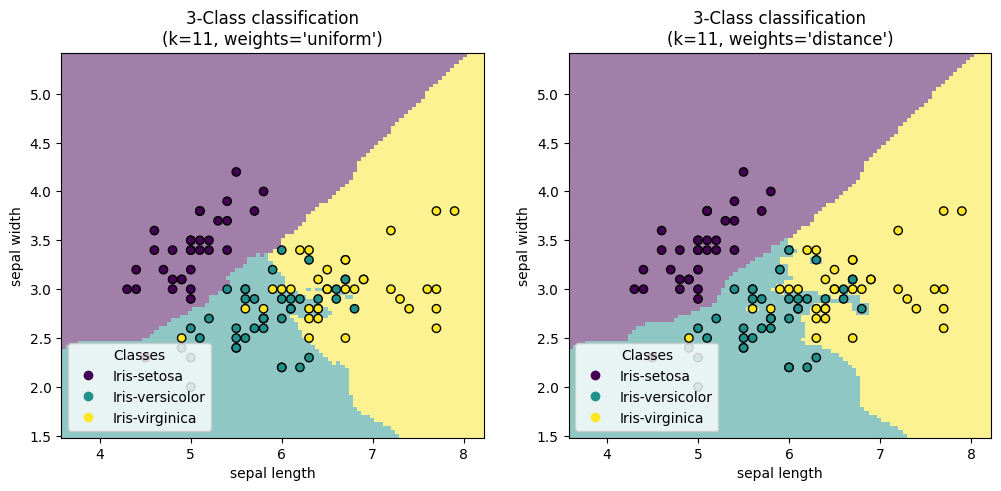

In [ ]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor, KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.inspection import DecisionBoundaryDisplay


# Ambil dua fitur utama untuk visualisasi decision boundary
feature_columns = ["sepal length", "sepal width"]
X = df_merged[feature_columns]
y = df_merged["class"]

# Encode label kelas ke numerik
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Mengubah nama kelas menjadi angka

# Menerapkan LOF untuk deteksi outlier
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
outlier_labels = lof.fit_predict(X)
df_merged["outlier"] = outlier_labels

# Menghapus data yang terdeteksi sebagai outlier
df_cleaned = df_merged[df_merged["outlier"] == 1].drop(columns=["outlier"])

# Membagi data menjadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    df_cleaned[feature_columns],
    label_encoder.transform(df_cleaned["class"]),  # Pastikan target dalam bentuk numerik
    test_size=0.2,
    random_state=42
)

# Pipeline dengan KNN dan StandardScaler
clf = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=11))
])

# Pelatihan model KNN
clf.fit(X_train, y_train)

# Evaluasi model
y_pred = clf.predict(X_test)
print(f"Akurasi: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Visualisasi Decision Boundary
_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    clf.set_params(knn__weights=weights).fit(X_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=feature_columns[0],
        ylabel=feature_columns[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(
        X_train.iloc[:, 0], X_train.iloc[:, 1],
        c=y_train, edgecolors="k", cmap="viridis"
    )
    disp.ax_.legend(
        scatter.legend_elements()[0],
        label_encoder.classes_,
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})"
    )

plt.show()


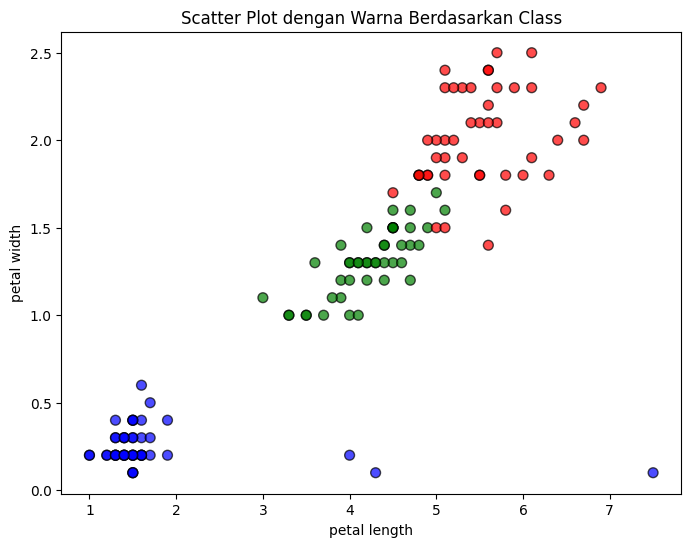

In [ ]:
import matplotlib.pyplot as plt

# Pilih dua fitur untuk scatter plot
x_feature = "petal length"
y_feature = "petal width"

# Warna berdasarkan kelas
colors = {"Iris-setosa": "blue", "Iris-versicolor": "green", "Iris-virginica": "red"}
df_cleaned["color"] = df_cleaned["class"].map(colors)

# Plot scatter dengan ukuran (s) dan warna (c)
plt.figure(figsize=(8, 6))
plt.scatter(df_cleaned[x_feature], df_cleaned[y_feature], s=50, c=df_cleaned["color"], alpha=0.7, edgecolors="k")
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.title("Scatter Plot dengan Warna Berdasarkan Class")
plt.show()

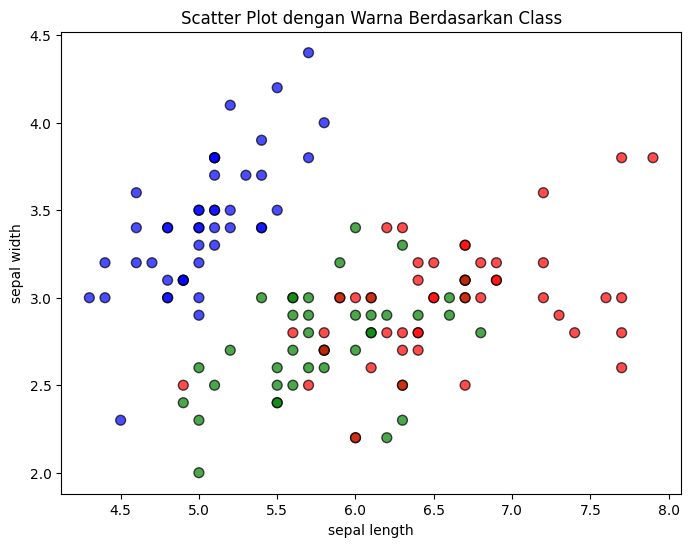

In [ ]:
import matplotlib.pyplot as plt

# Pilih dua fitur untuk scatter plot
x_feature = "sepal length"
y_feature = "sepal width"

# Warna berdasarkan kelas
colors = {"Iris-setosa": "blue", "Iris-versicolor": "green", "Iris-virginica": "red"}
df_cleaned["color"] = df_cleaned["class"].map(colors)

# Plot scatter dengan ukuran (s) dan warna (c)
plt.figure(figsize=(8, 6))
plt.scatter(df_cleaned[x_feature], df_cleaned[y_feature], s=50, c=df_cleaned["color"], alpha=0.7, edgecolors="k")
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.title("Scatter Plot dengan Warna Berdasarkan Class")
plt.show()